## 1. Чтение файла


In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import datetime

In [8]:
df = pd.read_csv('taxi.csv')
df1 = df.copy()
df2 = df.copy()

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  100000 non-null  object 
 1   vendor_id           100000 non-null  int64  
 2   pickup_datetime     100000 non-null  object 
 3   dropoff_datetime    100000 non-null  object 
 4   passenger_count     100000 non-null  int64  
 5   pickup_longitude    100000 non-null  float64
 6   pickup_latitude     100000 non-null  float64
 7   dropoff_longitude   100000 non-null  float64
 8   dropoff_latitude    100000 non-null  float64
 9   store_and_fwd_flag  100000 non-null  object 
 10  trip_duration       100000 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 8.4+ MB


In [10]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [11]:
df.head(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2863541,2,2016-01-31 13:12:20,2016-01-31 13:21:37,2,-73.989609,40.741718,-73.991013,40.755867,N,557
1,id1752141,1,2016-05-03 18:20:59,2016-05-03 18:41:09,1,-73.993935,40.761517,-73.975281,40.751507,N,1210
2,id1331142,1,2016-06-05 02:20:39,2016-06-05 02:28:04,1,-73.988625,40.722538,-73.980347,40.742752,N,445
3,id0227018,2,2016-01-11 20:07:13,2016-01-11 20:14:26,1,-73.976723,40.775311,-73.964333,40.765560,N,433
4,id2263790,2,2016-01-22 00:31:59,2016-01-22 00:40:48,5,-74.005852,40.740360,-73.988708,40.758781,N,529


In [12]:
df[df['store_and_fwd_flag'] != 'N']['id'].count()

559

# 1. Работа с df

In [13]:
df = df[['id', 'dropoff_datetime']]


In [14]:
df[df['dropoff_datetime'].apply(lambda x: x[:4]) != '2016'].count()

id                  0
dropoff_datetime    0
dtype: int64

In [15]:
df['dropoff_datetime'] = df['dropoff_datetime'].apply(lambda x: x[:10])


In [16]:
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])
df['is_weekend'] = df['dropoff_datetime'].apply(lambda x: x.weekday() >= 5)
df = df[df['is_weekend'] == True]
df

,id,dropoff_datetime,is_weekend
0,id2863541,2016-01-31,True
2,id1331142,2016-06-05,True
5,id3105911,2016-03-12,True
6,id3638379,2016-02-27,True
9,id0280140,2016-04-09,True
...,...,...,...
99988,id2622579,2016-03-06,True
99990,id3919255,2016-04-10,True
99992,id2189210,2016-01-23,True
99994,id0959872,2016-03-27,True


In [17]:
df=df[['dropoff_datetime']]
df['month'] = pd.DatetimeIndex(df['dropoff_datetime']).month
df.groupby('month').count().reset_index()

C:\Users\ivid0\AppData\Local\Temp\ipykernel_21368\242530459.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df['dropoff_datetime']).month


,month,dropoff_datetime
0,1,4632
1,2,4668
2,3,4716
3,4,5308
4,5,4994
5,6,4220


# 2. Созданиe df

In [18]:
from random import sample
symbols = '0123456789abcdefghigk'

def generate_random_sting():
    random_string = ''.join(sample(symbols, 15))
    return random_string

def retention_():
    retention = np.random.choice([1, 2, 3, 4, 5], size=1, p=[0.35, 0.25, 0.2, 0.15, 0.05])
    return retention

data = {
    'user_id': [], 
    'order_id': [], 
    'delivery_date': [], 
    'order_cost': [],
    'retention': []
}
for i in range(10_000):
    user_id = generate_random_sting()
    order_id = np.random.randint(1,10+1)
    delivery_date = np.random.normal(1440, 200)
    order_cost = np.random.exponential(scale=1) + 1
    retention = retention_()

    data['user_id'].append(user_id)
    data['order_id'].append(order_id)
    data['delivery_date'].append(delivery_date)
    data['order_cost'].append(order_cost)
    data['retention'].append(retention)

df = pd.DataFrame(data)
df = df.drop_duplicates(subset='user_id', keep='first')
df1 = df
df.head()

,user_id,order_id,delivery_date,order_cost,retention
0,f68921k047gi3be,2,1156.166331,1.144552,[3]
1,h49e1c03527f6ai,1,1609.983667,1.561693,[1]
2,4kgd86e29fci1g3,4,1241.470097,2.035454,[1]
3,05cehg8fb71462i,5,1538.673420,1.490157,[1]
4,gkg7a01d43i8hef,1,1829.661501,2.564185,[2]


# 3. Дополнение df

In [19]:
df_group = df[['order_id', 'delivery_date']].groupby('order_id').mean().reset_index()
df_group

,order_id,delivery_date
0,1,1449.956448
1,2,1444.512347
2,3,1440.922279
3,4,1442.196183
4,5,1445.163440
5,6,1435.348109
6,7,1441.602251
7,8,1441.529411
8,9,1429.654233
9,10,1445.954724


In [20]:
df = pd.merge(df, df_group, on='order_id', how='left')
df

,user_id,order_id,delivery_date_x,order_cost,retention,delivery_date_y
0,f68921k047gi3be,2,1156.166331,1.144552,[3],1444.512347
1,h49e1c03527f6ai,1,1609.983667,1.561693,[1],1449.956448
2,4kgd86e29fci1g3,4,1241.470097,2.035454,[1],1442.196183
3,05cehg8fb71462i,5,1538.673420,1.490157,[1],1445.163440
4,gkg7a01d43i8hef,1,1829.661501,2.564185,[2],1449.956448
...,...,...,...,...,...,...
9995,bca1eg3ih085d97,6,1581.920069,1.630535,[1],1435.348109
9996,f4gb6ge72ci513a,10,1547.776454,2.608241,[1],1445.954724
9997,e4i2fa0bdg76ch8,4,1273.988338,1.023744,[3],1442.196183
9998,35h904a6gigekb1,10,1204.101153,1.024151,[3],1445.954724


### сегмент

In [21]:
def get_segment(number):
    if number in (1, 2, 3):
        return '1-3'
    if number in (4, 5, 6):
        return '4-6'
    if number in (7, 8, 9):
        return '7-9'
    return '10'

In [22]:

df['segment'] = df['order_id'].apply(lambda x: get_segment(x))

In [23]:
df

,user_id,order_id,delivery_date_x,order_cost,retention,delivery_date_y,segment
0,f68921k047gi3be,2,1156.166331,1.144552,[3],1444.512347,1-3
1,h49e1c03527f6ai,1,1609.983667,1.561693,[1],1449.956448,1-3
2,4kgd86e29fci1g3,4,1241.470097,2.035454,[1],1442.196183,4-6
3,05cehg8fb71462i,5,1538.673420,1.490157,[1],1445.163440,4-6
4,gkg7a01d43i8hef,1,1829.661501,2.564185,[2],1449.956448,1-3
...,...,...,...,...,...,...,...
9995,bca1eg3ih085d97,6,1581.920069,1.630535,[1],1435.348109,4-6
9996,f4gb6ge72ci513a,10,1547.776454,2.608241,[1],1445.954724,10
9997,e4i2fa0bdg76ch8,4,1273.988338,1.023744,[3],1442.196183,4-6
9998,35h904a6gigekb1,10,1204.101153,1.024151,[3],1445.954724,10


# 4. Исследование df

In [24]:
cost = df['order_cost']
median = cost.median()
mean = cost.mean()
mode = 1 # ????????????????????????????? у эксп. распределения нет моды.
std = cost.std()
dispers = cost.var()
print(f"""
    медиана = {median}
    среднее = {mean}
    мода = {mode}
    стандартное отклонение = {std}
    дисперсия = {dispers}
    """
)


    мидана = 1.6981454705051724
    среднее = 2.0038276570766183
    мода = 1
    стандартное отклонение = 1.0025658273272897
    дисперсия = 1.005138238124453
    


In [25]:
df1 = df1[['order_id','delivery_date']]

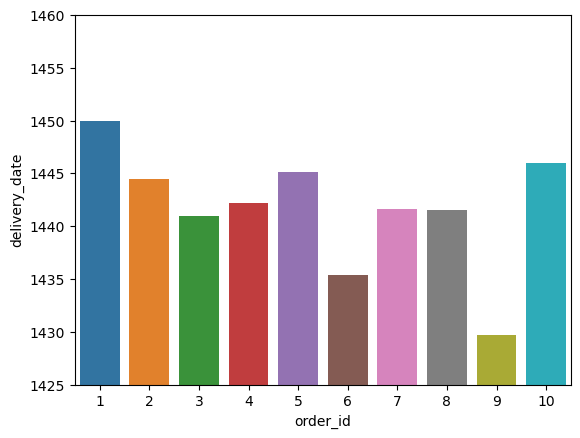

In [26]:
sns.barplot(df1, x = 'order_id', y = 'delivery_date', errorbar=None)

plt.axis([None, None, 1425, 1460])

plt.show();

In [28]:
order_numbers = sorted(df['order_id'].unique())
order_numbers

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

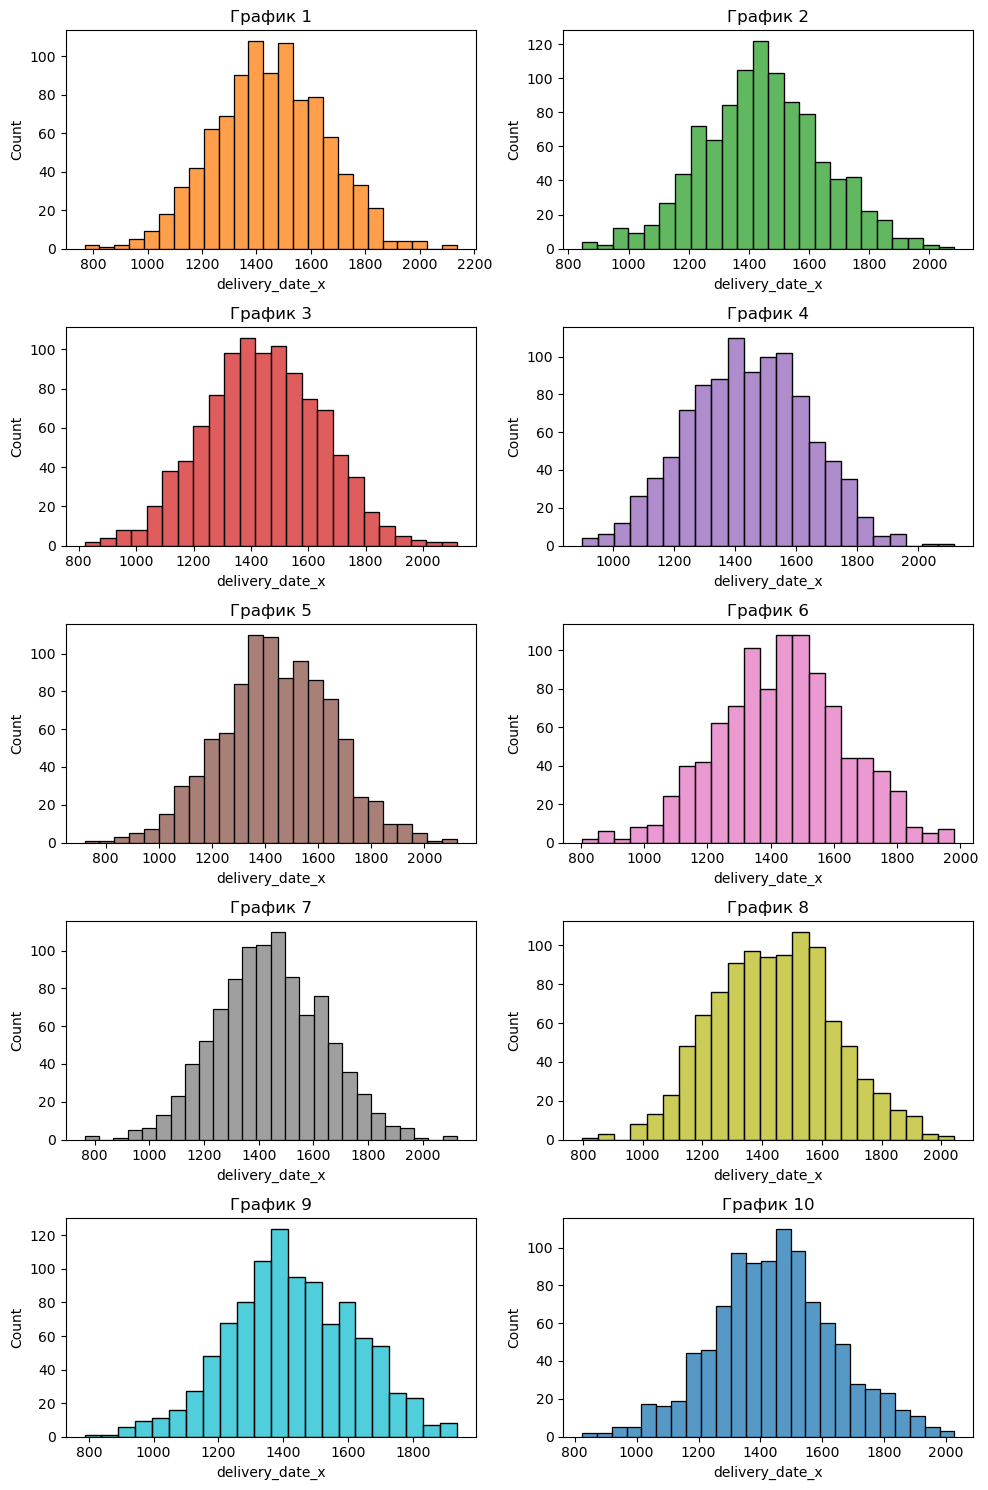

In [29]:

fig, axs = plt.subplots(5, 2, figsize=(10, 15))

ax_iter = axs.flat

for i in (order_numbers):
    ax = next(ax_iter)

    df_g = df[df['order_id'] == i]['delivery_date_x']

    sns.histplot(df_g, ax=ax, color=f'C{i}')
    ax.set_title(f'График {i}')

for ax in ax_iter:
    ax.axis("off")


plt.tight_layout()
plt.show()
# ВЫДЕЛЕНИЕ МАКСИМУМА

# 5.


### elbow

In [30]:
clustering_df = df[['delivery_date_x', 'order_cost']]

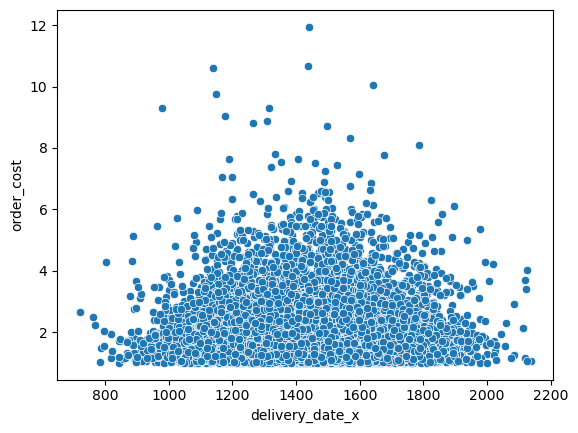

In [31]:
sns.scatterplot(data=clustering_df, x='delivery_date_x', y='order_cost')
plt.show()

In [32]:
from sklearn.cluster import KMeans


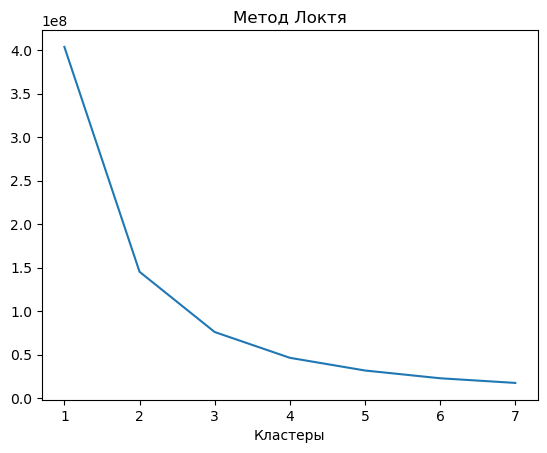

In [33]:
WCSS = []

for i in range(1,8):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state=42, n_init=10)
    kmeans.fit(clustering_df)
    WCSS.append(kmeans.inertia_)

plt.plot(range(1,8), WCSS, scalex=True)
plt.title('Метод Локтя')
plt.xlabel('Кластеры')
plt.show()

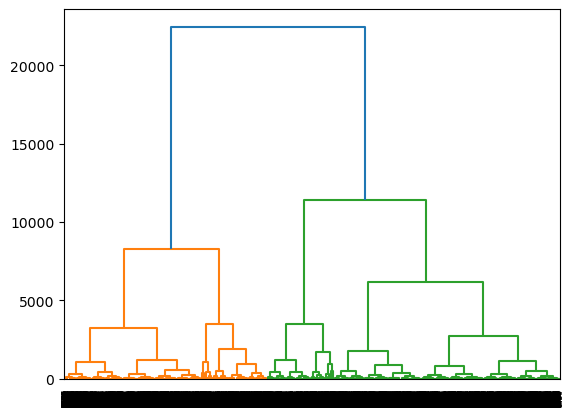

In [34]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(clustering_df, method='ward'))
plt.show()

видно что кластеров 4

c:\Users\ivid0\.conda\envs\machine_learning\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


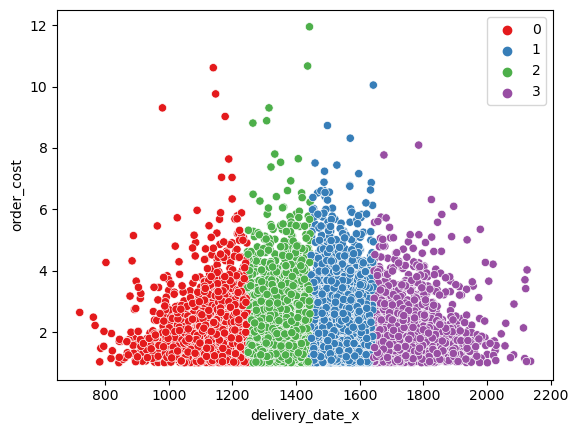

In [35]:
k_means = KMeans(n_clusters=4).fit(clustering_df)
clusters = k_means.predict(clustering_df)

df['Cluster'] = clusters 

sns.scatterplot(data=df, x='delivery_date_x', y='order_cost', hue=clusters, palette='Set1')

plt.show()

In [36]:
df.head()

,user_id,order_id,delivery_date_x,order_cost,retention,delivery_date_y,segment,Cluster
0,f68921k047gi3be,2,1156.166331,1.144552,[3],1444.512347,1-3,0
1,h49e1c03527f6ai,1,1609.983667,1.561693,[1],1449.956448,1-3,1
2,4kgd86e29fci1g3,4,1241.470097,2.035454,[1],1442.196183,4-6,0
3,05cehg8fb71462i,5,1538.673420,1.490157,[1],1445.163440,4-6,1
4,gkg7a01d43i8hef,1,1829.661501,2.564185,[2],1449.956448,1-3,3


A\B анализ

In [37]:
df_clust = df.groupby("Cluster")
df_clust.count().T

Cluster,0,1,2,3
user_id,1660,3315,3425,1600
order_id,1660,3315,3425,1600
delivery_date_x,1660,3315,3425,1600
order_cost,1660,3315,3425,1600
retention,1660,3315,3425,1600
delivery_date_y,1660,3315,3425,1600
segment,1660,3315,3425,1600


In [38]:
df_clust[['delivery_date_x', 'delivery_date_y', 'order_cost', 'retention']].agg(lambda x: np.mean(x)).T

Cluster,0,1,2,3
delivery_date_x,1141.377254,1535.770165,1352.506399,1748.979511
delivery_date_y,1441.48386,1441.718712,1441.551475,1441.869645
order_cost,1.992669,2.028242,2.000749,1.971411
retention,[2.3409638554216867],[2.2660633484162895],[2.268905109489051],[2.300625]
